<a href="https://colab.research.google.com/github/NicoRGabriel/Predi-o-de-Investimentos/blob/main/Desafio_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Análise Descritiva**

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("/content/MKT.csv")

In [ ]:
df.head()

,youtube,facebook,newspaper,sales
0,84.72,19.20,48.96,12.60
1,351.48,33.96,51.84,25.68
2,135.48,20.88,46.32,14.28
3,116.64,1.80,36.00,11.52
4,318.72,24.00,0.36,20.88


In [ ]:
df.tail()

,youtube,facebook,newspaper,sales
166,45.84,4.44,16.56,9.12
167,113.04,5.88,9.72,11.64
168,212.40,11.16,7.68,15.36
169,340.32,50.40,79.44,30.60
170,278.52,10.32,10.44,16.08


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   youtube    171 non-null    float64
 1   facebook   171 non-null    float64
 2   newspaper  171 non-null    float64
 3   sales      171 non-null    float64
dtypes: float64(4)
memory usage: 5.5 KB


In [ ]:
df.describe()

,youtube,facebook,newspaper,sales
count,171.000000,171.000000,171.000000,171.000000
mean,178.021053,27.671579,35.240000,16.922807
std,102.449597,17.913532,24.902918,6.314608
min,0.840000,0.000000,0.360000,1.920000
25%,91.080000,11.700000,13.740000,12.540000
50%,179.760000,26.760000,31.080000,15.480000
75%,262.980000,43.680000,50.880000,20.820000
max,355.680000,59.520000,121.080000,32.400000


### **Análise exploratória**

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
total_youtube = df["youtube"].sum()
total_youtube

30441.6

In [ ]:
total_facebook = df["facebook"].sum()
total_facebook

4731.84

In [ ]:
total_newspaper = df["newspaper"].sum()
total_newspaper

6026.04

In [ ]:
total_sales = df["sales"].sum()
total_sales

2893.7999999999993

In [ ]:
sns.barplot()

In [ ]:
maior_retorno = df.loc[df['sales'].idxmax()]
maior_retorno

youtube      332.28
facebook      58.68
newspaper     50.16
sales         32.40
Name: 146, dtype: float64

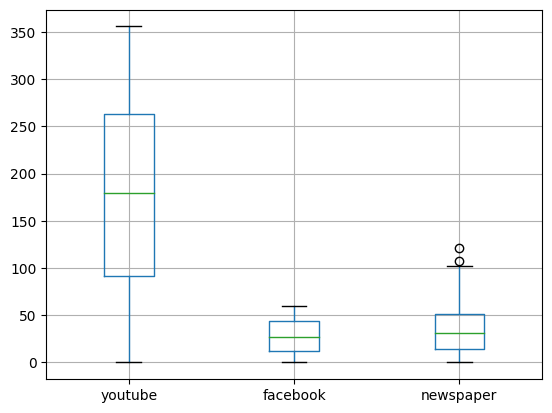

In [ ]:
df.boxplot(column=["youtube", "facebook", "newspaper"])
plt.show()

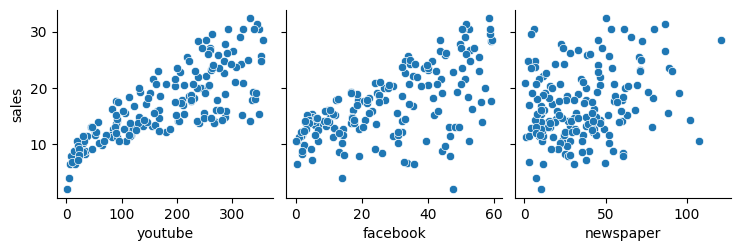

In [ ]:
sns.pairplot(df, x_vars= ["youtube", "facebook", "newspaper"], y_vars= "sales")

<Axes: >

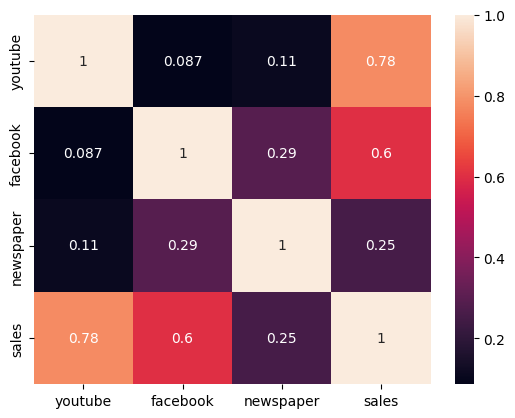

In [ ]:
sns.heatmap(df.corr(), annot= True)

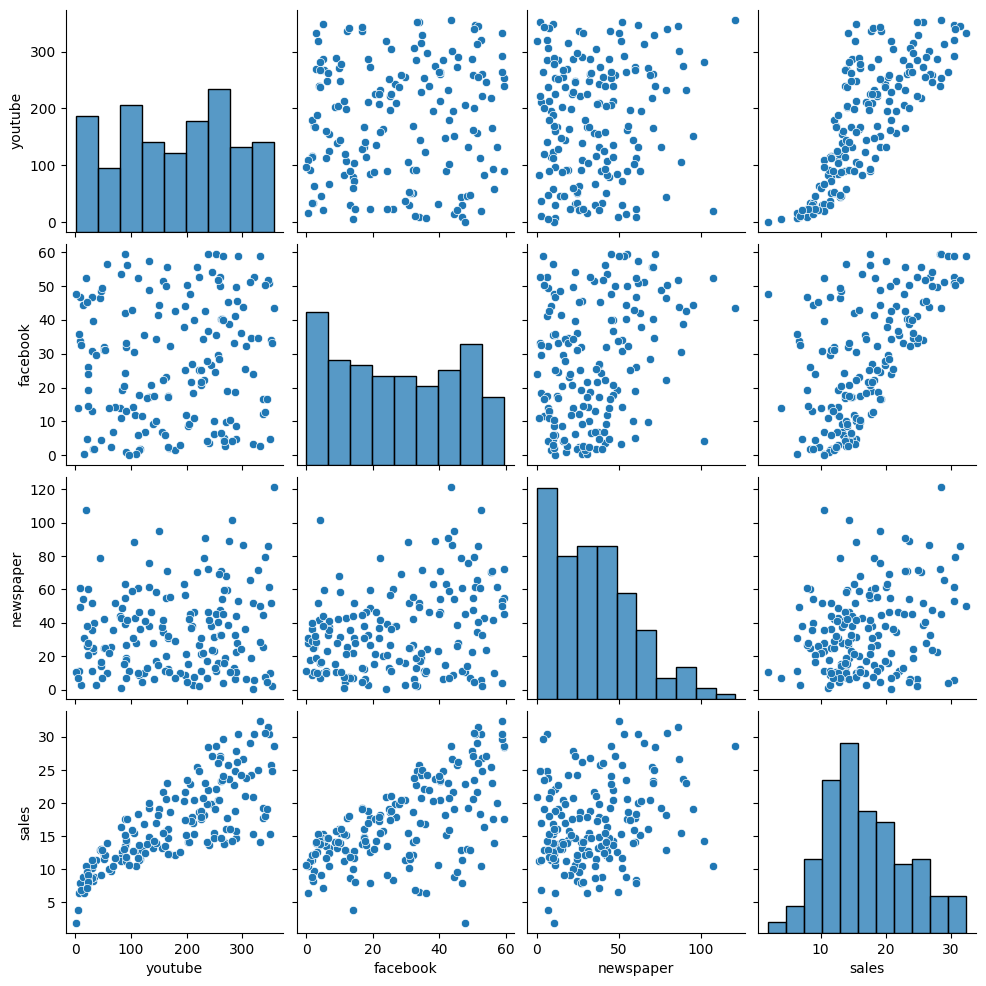

In [ ]:
sns.pairplot(df)

In [ ]:
df.corr()

,youtube,facebook,newspaper,sales
youtube,1.000000,0.086538,0.110759,0.782030
facebook,0.086538,1.000000,0.293425,0.602918
newspaper,0.110759,0.293425,1.000000,0.254987
sales,0.782030,0.602918,0.254987,1.000000


### **Modelagem**

In [ ]:
%pip install plotly
%pip install cufflinks
%pip install chart-studio

In [ ]:
import numpy as np
import chart_studio.plotly as py
import cufflinks as cf

import plotly.graph_objects as go
import plotly.express as px

In [ ]:
X = df[['youtube', 'facebook','newspaper']]

In [ ]:
Y = df[['sales']]

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size = 0.7, test_size =0.3, random_state= 42)


In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(119, 3)
(52, 3)
(119, 1)
(52, 1)


In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lm = LinearRegression()

In [ ]:
lm.fit(x_train, y_train)

LinearRegression()

In [ ]:
y_pred = lm.predict(x_test)

In [ ]:
from sklearn.metrics import r2_score
r = r2_score(y_test, y_pred)

In [ ]:
print("r_quadrado:", r)

r_quadrado: 0.882423505618885


In [ ]:
import matplotlib.pyplot as plt

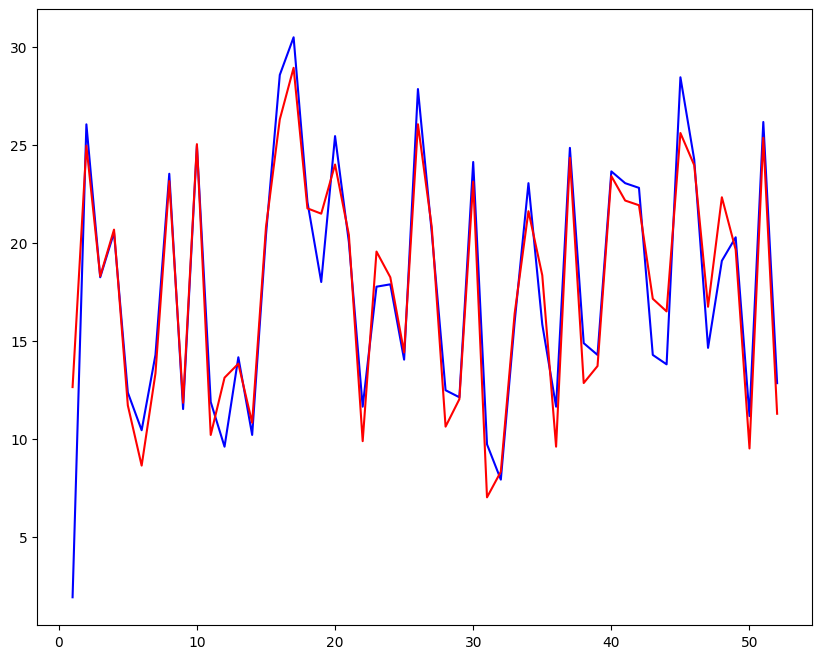

In [ ]:
c = [i for i in range(1, 53, 1)]
fig = plt.figure(figsize=(10,8))
plt.plot(c, y_test, color="blue")
plt.plot(c, y_pred, color = "red")


### **Calculando predição de investimento**

In [ ]:
invest_youtube = 70
invest_facebook = 100
invest_newspaper = 20

invest_total = [[invest_youtube,invest_facebook,invest_newspaper]]
lm.predict(invest_total)[0]

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([25.63485349])